# FINAL PROJECT THICKET

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("done")

done


Read in all the files

# MPI Thicket Variables

In [5]:
mpi_random_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/Random/*/*.cali"))
mpi_reverse_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/ReverseSorted/*/*.cali"))
mpi_perturbed_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/Perturbed/*/*.cali"))
mpi_sorted_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/Sorted/*/*.cali"))

# CUDA Thicket Variables

In [6]:
cuda_random_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/Random/*/*.cali"))
cuda_reverse_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/ReverseSorted/*/*.cali"))
cuda_perturbed_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/Perturbed/*/*.cali"))
cuda_sorted_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/Sorted/*/*.cali"))

In [7]:
tks = {}

tks["mpi_sorted"] = mpi_sorted_tk
tks["mpi_reverse"] = mpi_reverse_tk
tks["mpi_random"] = mpi_random_tk
tks["mpi_perturbed"] = mpi_perturbed_tk

tks["cuda_sorted"] = cuda_sorted_tk
tks["cuda_reverse"] = cuda_reverse_tk
tks["cuda_random"] = cuda_random_tk
tks["cuda_perturbed"] = cuda_perturbed_tk


In [8]:
for i in tks.values():
    i.statsframe.dataframe["time"] = 1

print(tks["cuda_random"].tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [43]:
# Performance data
for inputType in tks.keys():
    if "mpi" in inputType:
        tks[inputType].metadata["values_per_proc"] = tks[inputType].metadata["InputSize"] // tks[inputType].metadata["num_procs"]
tks["mpi_random"].dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              121569189     1   
                                                  145562348     1   
                                                  243974900     1   
                                                  244497352     1   
                                                  264763655     1   
                                                  267352453     1   
                                                  396802262     1   
                                                  406565177     1   
                                                  446143504     1   
                                                  573174663     1   
                                                  602627586     1   
                                                  712356224     1   
                                                  788286055     1   
                                                  791511023     1   
                                                  833366394     1   
                                                  907490309     1   
                                                  1017750183    1   
                                                  1049476715    1   
                                                  1171058059    1   
                                                  1201325766    1   
                                                  1300094249    1   
                                                  1382228857    1   
                                                  1424530190    1   
                                                  1447575159    1   
                                                  1475700261    1   
                                                  1510294426    1   
                                                  1545827220    1   
                                                  1554490782    1   
                                                  1555012850    1   
                                                  1614797389    1   
                                                  1628075355    1   
                                                  1654942197    1   
                                                  1756589640    1   
                                                  1815547707    1   
                                                  1867975594    1   
                                                  1939688023    1   
                                                  1954467605    1   
                                                  2011269404    1   
                                                  2103478004    1   
                                                  2222205902    1   
                                                  2239453462    1   
                                                  2289775128    1   
                                                  2291385317    1   
                                                  2332591192    1   
                                                  2375951346    1   
                                                  2506020778    1   
                                                  2515942954    1   
                                                  2608499705    1   
                                                  2614743939    1   
                                                  2677243835    1   
                                                  2709465597    1   
                                                  2760421031    1   
                                                  2856044889    1   
                                                  2925695988    1   
                                                  2955781570    1   
                                                  3097490828    1   
                                                  3136270459

In [10]:
tks.keys()

dict_keys(['mpi_sorted', 'mpi_reverse', 'mpi_random', 'mpi_perturbed', 'cuda_sorted', 'cuda_reverse', 'cuda_random', 'cuda_perturbed'])

In [44]:
gbs = {}

for i in tks.keys():
    if "mpi" in i:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("values_per_proc")
    else:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afa15244d30>, 262144: <thicket.thicket.Thicket object at 0x2afa151b83a0>, 1048576: <thicket.thicket.Thicket object at 0x2afa1d4a6eb0>, 4194304: <thicket.thicket.Thicket object at 0x2afa17b1c3d0>, 16777216: <thicket.thicket.Thicket object at 0x2afa1523b670>, 67108864: <thicket.thicket.Thicket object at 0x2afa1533e8b0>, 268435456: <thicket.thicket.Thicket object at 0x2afa14821430>}
22  thickets created...
{64: <thicket.thicket.Thicket object at 0x2afa145a5790>, 128: <thicket.thicket.Thicket object at 0x2afa145a9d90>, 256: <thicket.thicket.Thicket object at 0x2afa148514f0>, 512: <thicket.thicket.Thicket object at 0x2afa1483feb0>, 1024: <thicket.thicket.Thicket object at 0x2afa14a42e80>, 2048: <thicket.thicket.Thicket object at 0x2afa14a36d00>, 4096: <thicket.thicket.Thicket object at 0x2afa14a21d00>, 8192: <thicket.thicket.Thicket object at 0x2afa14968eb0>, 16384: <thicket.thicket.Thicket object at 0x2afa148824c0>, 32768

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afa1df95d90>, 262144: <thicket.thicket.Thicket object at 0x2afa1cdd40a0>, 1048576: <thicket.thicket.Thicket object at 0x2afa1cdc2940>, 4194304: <thicket.thicket.Thicket object at 0x2afa1cdf68b0>, 16777216: <thicket.thicket.Thicket object at 0x2afa1cddfd60>, 67108864: <thicket.thicket.Thicket object at 0x2afa1cddfbb0>, 268435456: <thicket.thicket.Thicket object at 0x2afa17ce7910>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2afa17d06d30>, 262144: <thicket.thicket.Thicket object at 0x2afa17ce91f0>, 1048576: <thicket.thicket.Thicket object at 0x2afa17cf1a30>, 4194304: <thicket.thicket.Thicket object at 0x2afa1dca0df0>, 16777216: <thicket.thicket.Thicket object at 0x2afa1dc83a60>, 67108864: <thicket.thicket.Thicket object at 0x2afa1dca9190>, 268435456: <thicket.thicket.Thicket object at 0x2afa1dca39d0>}


Compose these 3 groups column-wise to get a holistic view of the data

In [23]:
print(gbs.keys())

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])


In [45]:
ctks = {}

for i in gbs.keys():
#     if "strong" in i:
    if "mpi" in i:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_procs"
        )
    else:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_threads"
        )
        
valsPerProcList = ctks["mpi_random_weak"].dataframe.columns.get_level_values(0).unique().drop("name")

In [46]:
# mpi_strong_random_ctk.dataframe

ctks["mpi_random_strong"].dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              2             1   
                                                  4             1   
                                                  8             1   
                                                  16            1   
                                                  32            1   
                                                  64            1   
                                                  128           1   
                                                  256           1   
                                                  512           1   
                                                  1024          1   
{'name': 'comm', 'type': 'function'}              2             3   
                                                  4             3   
                                                  8             3   
                                                  16            3   
                                                  32            3   
                                                  64            3   
                                                  128           3   
                                                  256           3   
                                                  512           3   
                                                  1024          3   
{'name': 'MPI_Barrier', 'type': 'function'}       2             4   
                                                  4             4   
                                                  8             4   
                                                  16            4   
                                                  32            4   
                                                  64            4   
                                                  128           4   
                                                  256           4   
                                                  512           4   
                                                  1024          4   
{'name': 'comm_large', 'type': 'function'}        2             5   
                                                  4             5   
                                                  8             5   
                                                  16            5   
                                                  32            5   
                                                  64            5   
                                                  128           5   
                                                  256           5   
                                                  512           5   
                                                  1024          5   
{'name': 'MPI_Recv', 'type': 'function'}          2             7   
                                                  4             7   
                                                  8             7   
                                                  16            7   
                                                  32            7   
                                                  64            7   
                                                  128           7   
                                                  256           7   
                                                  512           7   
                                                  1024          7   
{'name': 'MPI_Send', 'type': 'function'}          2             6   
                                                  4             6   
                                                  8             6   
                                                  16            6   
                                                  32            6   
                                                  64      

Perform pandas operations to get the table in a desirable format for plotting

In [47]:
for i in ctks.keys():
    if "cuda" in i:
        for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
            ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

    else:
        for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
            ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)

        ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [48]:
ctks["mpi_sorted_strong"].dataframe

65536                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.504291      0.504758      0.504525   
                  4              0.641779      0.644326      0.643522   
                  8              0.497369      0.501218      0.500232   
                  16             0.780881      0.785008      0.783347   
                  32             1.680443      1.681684      1.681180   
                  64             3.069992      3.073516      3.071510   
                  128            2.900974      3.009682      2.954019   
                  256            3.351819      3.462324      3.399503   
                  512            4.074387      4.245160      4.163588   
                  1024           5.868611      6.032459      5.956222   
comm              2              0.000973      0.003876      0.002424   
                  4              0.005910      0.011546      0.008326   
                  8              0.003424      0.009669      0.005228   
                  16             0.004862      0.010584      0.006619   
                  32             0.051604      0.057822      0.053653   
                  64             0.020066      0.051038      0.036645   
                  128            0.026911      0.067052      0.053850   
                  256            0.038738      0.106660      0.073024   
                  512            0.068960      0.209478      0.144053   
                  1024           0.119518      0.615185      0.302833   
MPI_Barrier       2              0.000657      0.002427      0.001542   
                  4              0.003603      0.004218      0.004057   
                  8              0.001750      0.003200      0.002379   
                  16             0.003724      0.005687      0.004659   
                  32             0.049720      0.050746      0.050498   
                  64             0.002361      0.032968      0.019626   
                  128            0.000977      0.037631      0.026341   
                  256            0.004232      0.053890      0.038218   
                  512            0.005122      0.139798      0.080837   
                  1024           0.005293      0.492924      0.187247   
comm_large        2              0.000221      0.000716      0.000468   
                  4              0.001586      0.005018      0.003340   
                  8              0.000336      0.005769      0.002542   
                  16             0.000562      0.005355      0.001674   
                  32             0.000975      0.006671      0.002780   
                  64             0.013482      0.018306      0.014133   
                  128            0.023704      0.030511      0.025533   
                  256            0.028774      0.037265      0.031938   
                  512            0.052107      0.069284      0.059021   
                  1024           0.096023      0.124691      0.107582   
MPI_Recv          2              0.000111      0.000613      0.000362   
                  4              0.000192      0.004525      0.002634   
                  8              0.000124      0.005651      0.002368   
                  16             0.000207      0.005175      0.001353   
                  32             0.000339      0.006345      0.002216   
                  64             0.011215      0.017699      0.012424   
                  128            0.018932      0.029352      0.023222   
                  256            0.024453      0.034639      0.027619   
                  512            0.042910      0.064856      0.050434   
                  1024           0.076946      0.115664      0.090845   
MPI_Send          2              0.000087      0.000090      0.000088   
                  4              0.000067      0.001334      0.000660   
                  8  

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [49]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

# Examples

In [50]:
ctks["mpi_random_strong"].dataframe.loc["main"][262144]

Min time/rank  Max time/rank  Avg time/rank   Total time  \
num_procs                                                             
2               0.544036       0.545587       0.544811     1.089623   
4               0.419941       0.434451       0.430287     1.721148   
8               0.546793       0.554654       0.552645     4.421164   
16              0.798738       0.803839       0.801991    12.831850   
32              1.448989       1.459328       1.454063    46.530021   
64              2.693941       2.759892       2.727405   174.553951   
128             2.941163       3.050484       2.995245   383.391349   
256             3.661802       3.772900       3.715069   951.057552   
512             8.067770       8.716865       8.525207  4364.905964   
1024            6.625018       6.751135       6.680800  6841.138929   

           Variance time/rank  
num_procs                      
2                    0.000001  
4                    0.000036  
8                    0.000005  
16                   0.000001  
32                   0.000007  
64                   0.000187  
128                  0.000627  
256                  0.000429  
512                  0.032467  
1024                 0.001035

In [51]:
ctks.keys()

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])

In [52]:
# function_names = ("main", "comp", "comm", "comm_small", "comm_large", "comp_small", "comp_large")
function_names = ("main", "comm", "comp_large")
# function_names = set(ctks["mpi_strong_perturbed"].dataframe.index.get_level_values("name"))

# MPI STRONG SCALING TIME PLOTS

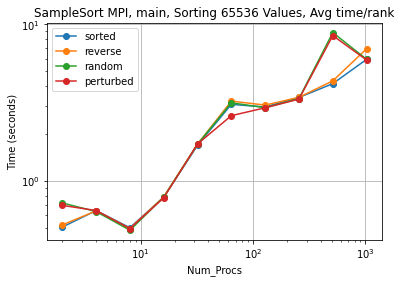

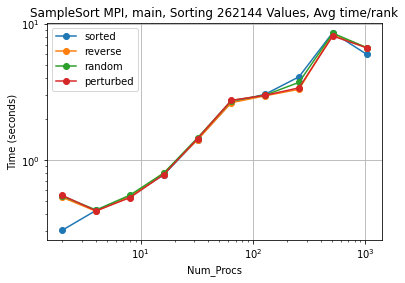

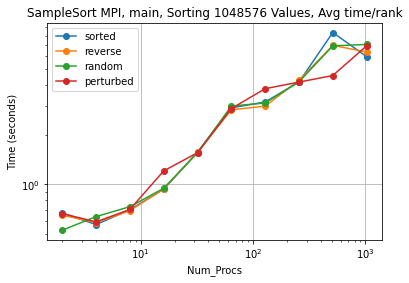

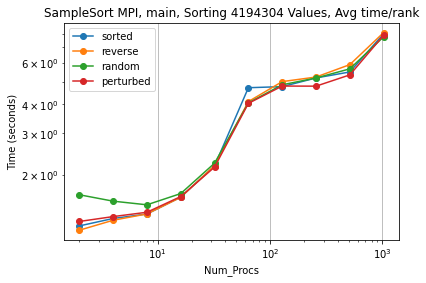

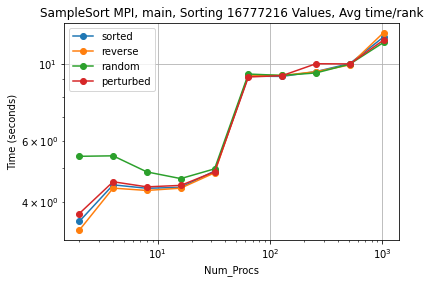

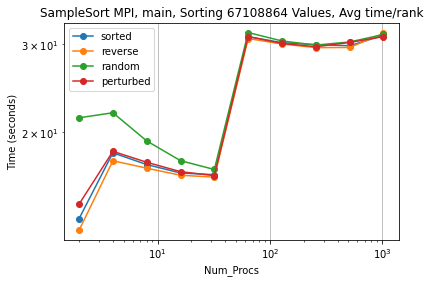

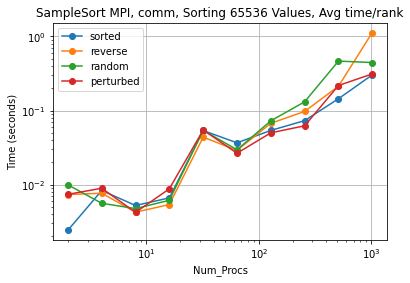

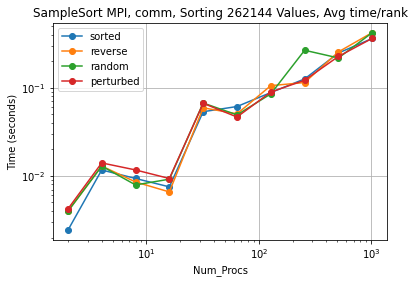

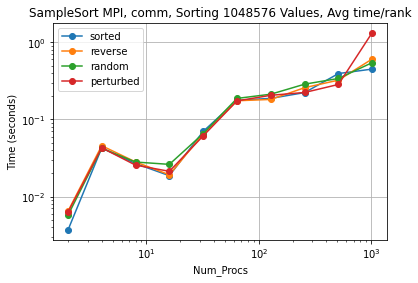

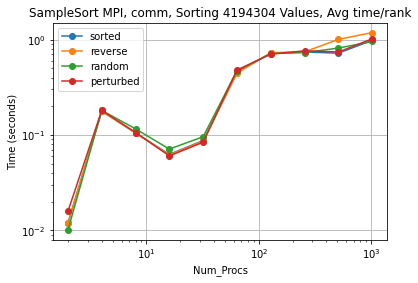

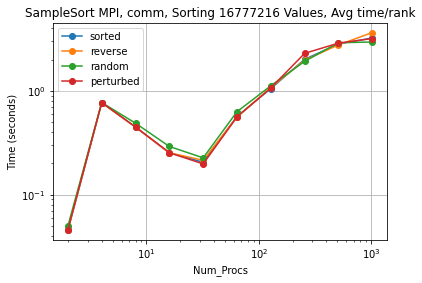

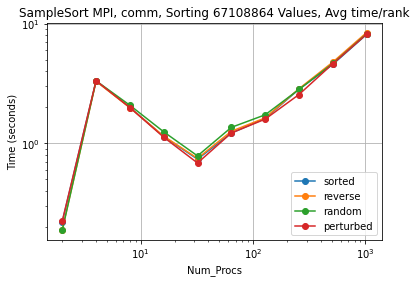

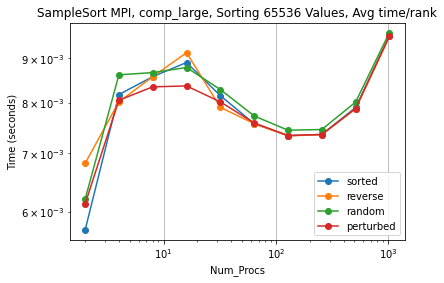

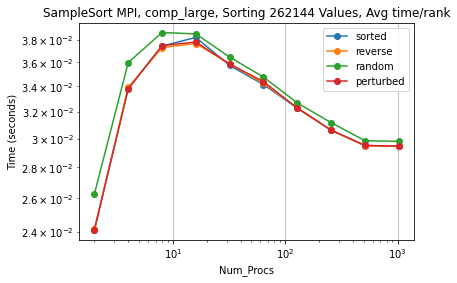

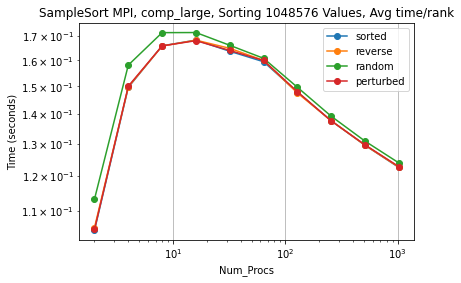

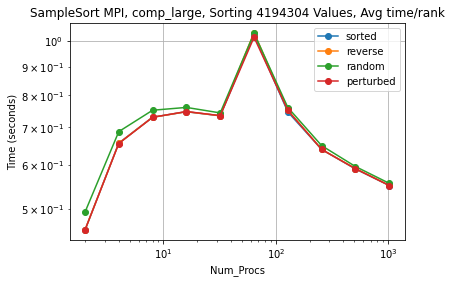

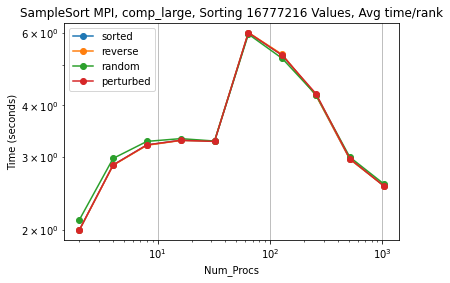

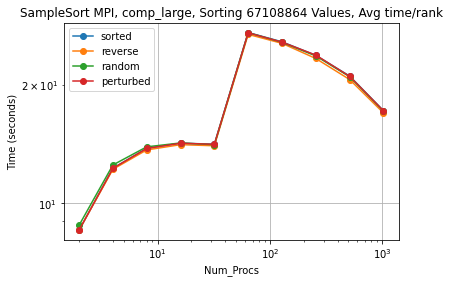

In [53]:
for name in function_names:
    for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "mpi" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas(
            df=masterDF,
            title="SampleSort MPI, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

# MPI WEAK SCALING TIME PLOTS

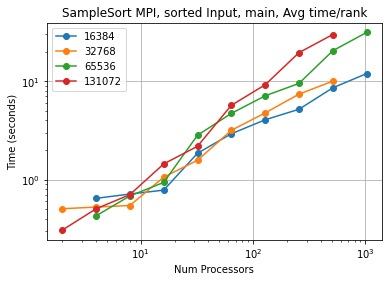

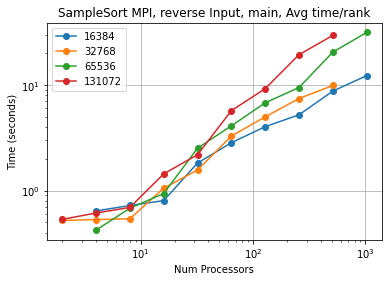

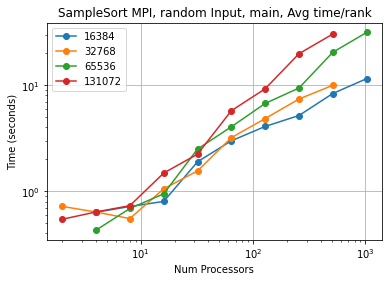

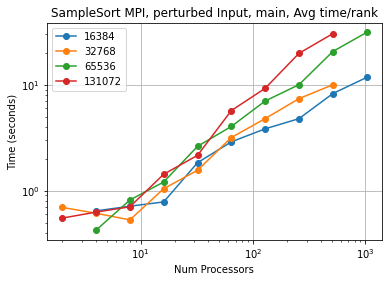

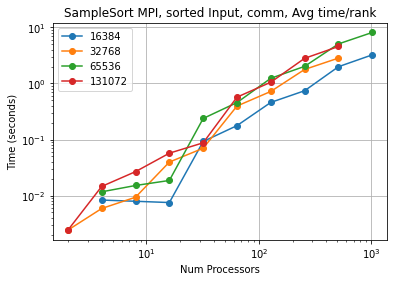

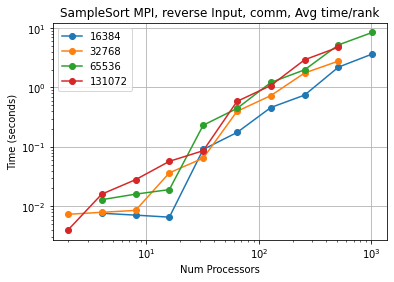

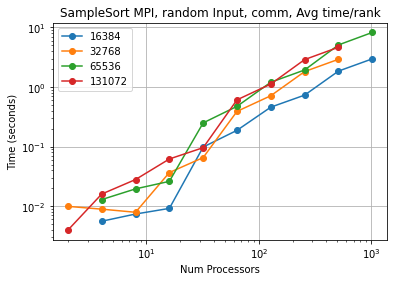

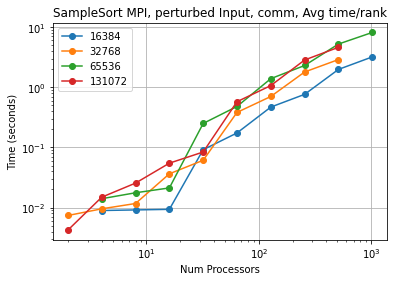

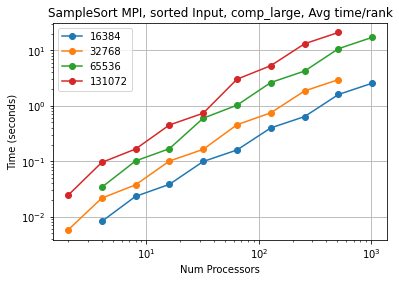

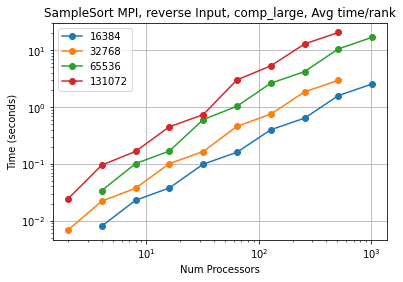

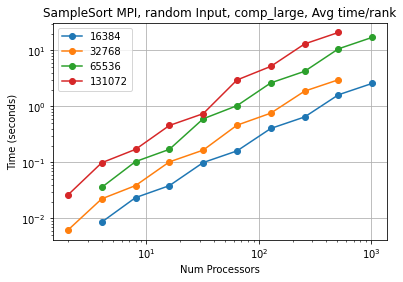

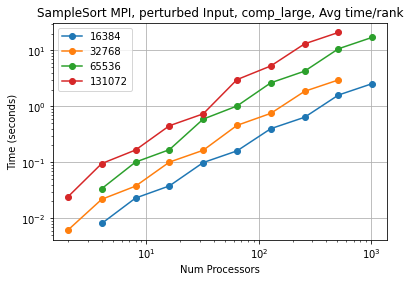

In [56]:
def count_nan(arr):
    count = 0
    for k in arr:
        if k >= 0:
            count += 1
    return count

for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "mpi" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in valsPerProcList: #[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]: #[262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0]: #[256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0, 16384.0, 32768.0, 65536.0, 131072.0, 262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0, 8388608.0, 16777216.0, 33554432.0, 67108864.0, 134217728.0]: # for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                    
                if(count_nan(tempDF.values) > 4):
                    tempDF = tempDF.rename(inputSize)    
                    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
            masterDF = masterDF.apply(lambda x: x.fillna((x.shift() + x.shift(-1)) / 2))
        
            plot_pandas(
                df=masterDF,
                title="SampleSort MPI, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num Processors",
                ylabel="Time (seconds)",
                loglog=True
            )

# CUDA STRONG SCALING TIME PLOTS

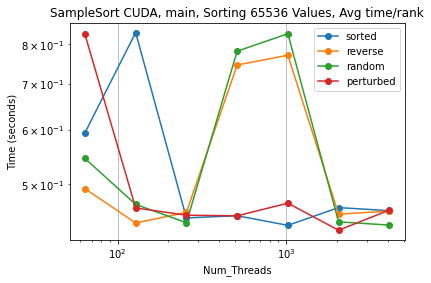

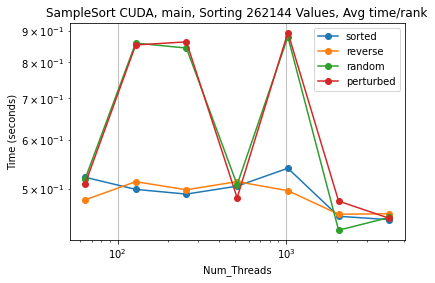

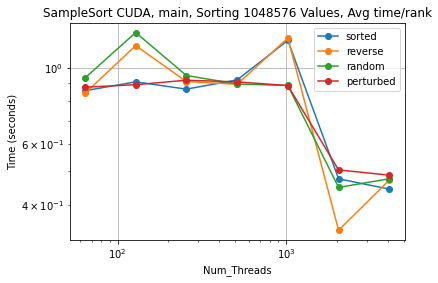

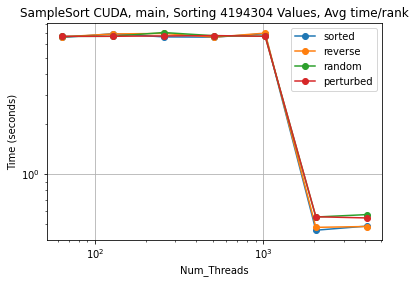

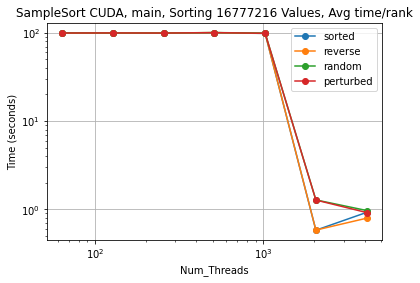

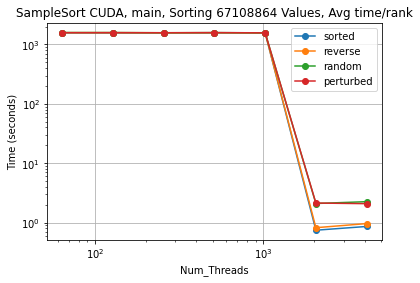

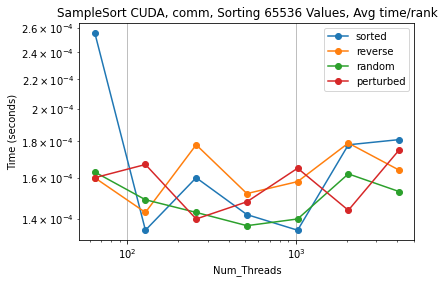

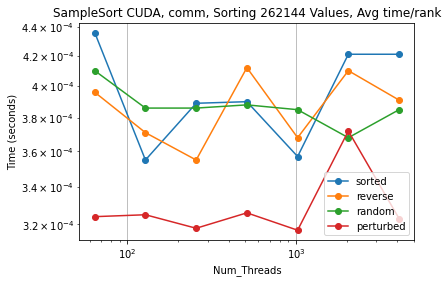

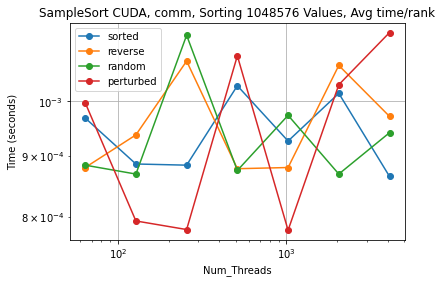

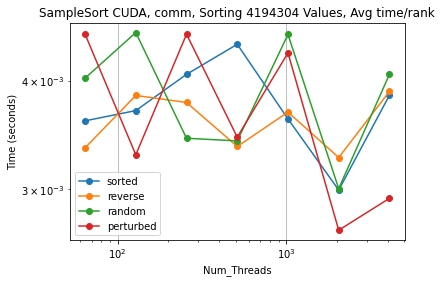

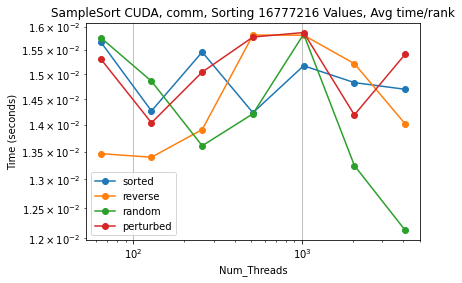

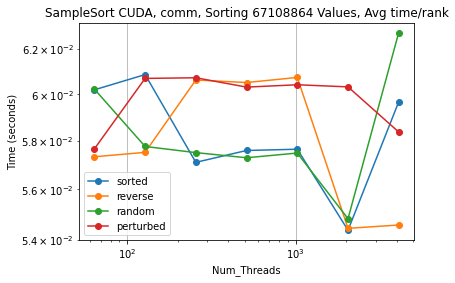

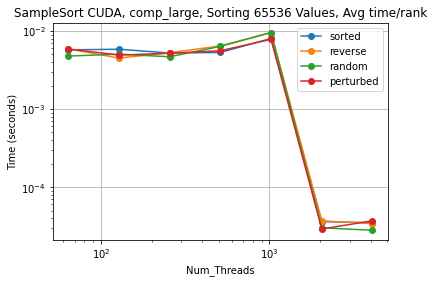

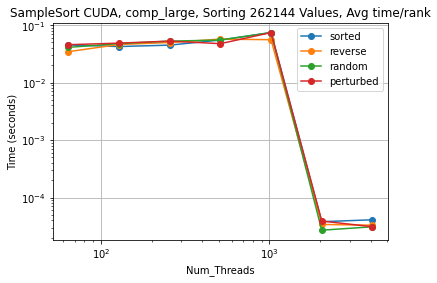

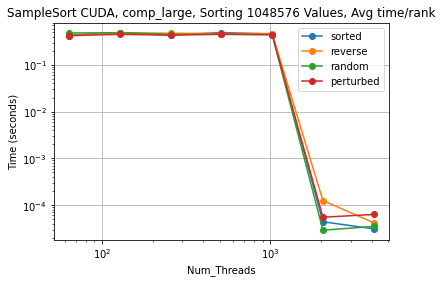

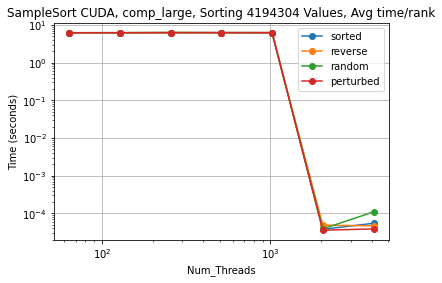

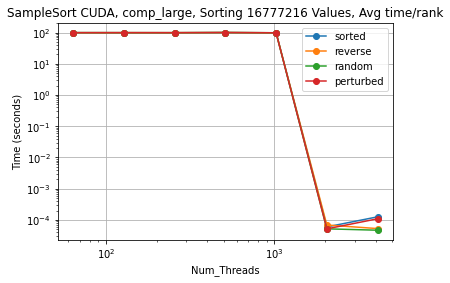

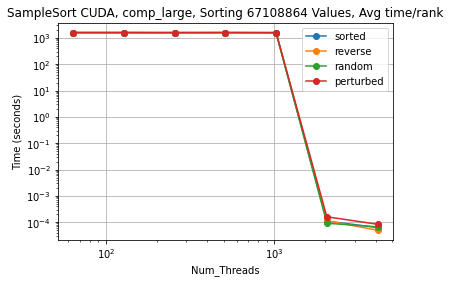

In [35]:
for name in function_names:
    for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "cuda" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas(
            df=masterDF,
            title="SampleSort CUDA, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Threads",
            ylabel="Time (seconds)",
            loglog=True
        )

# CUDA WEAK SCALING TIME PLOTS

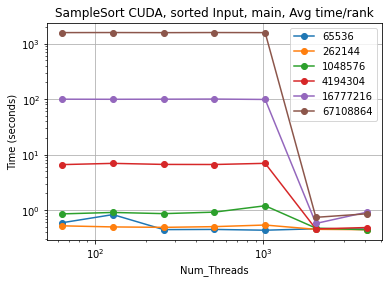

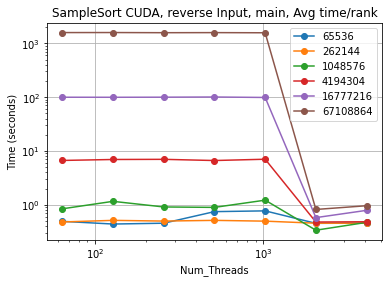

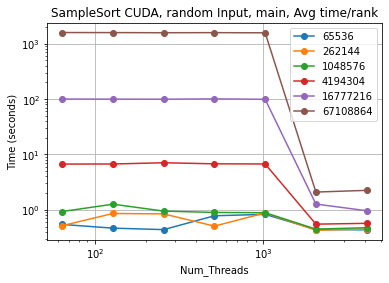

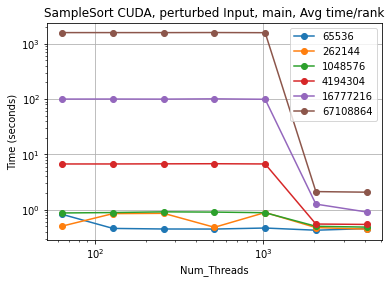

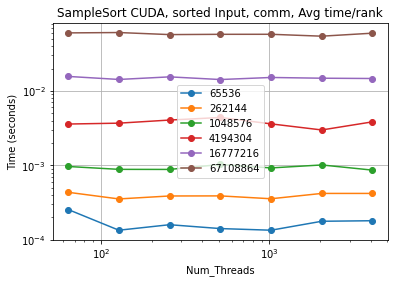

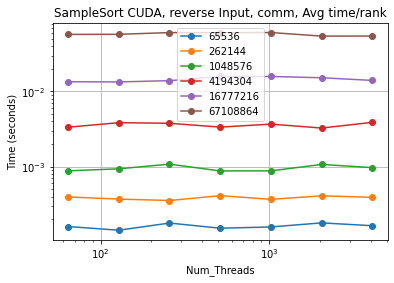

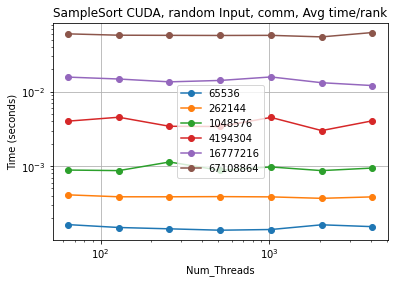

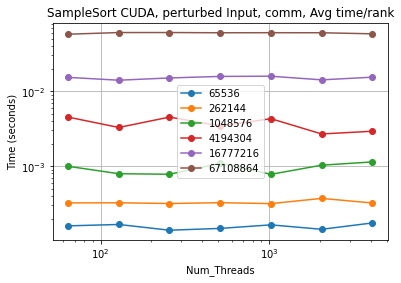

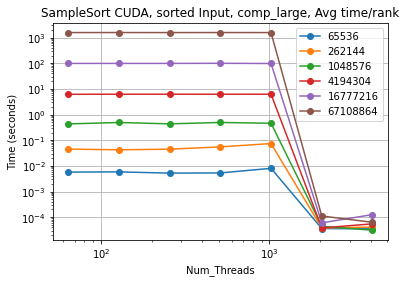

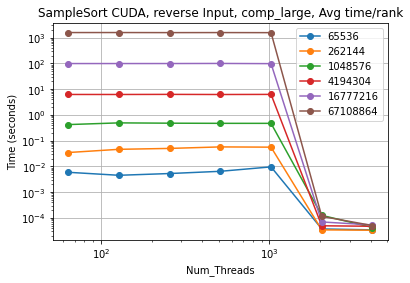

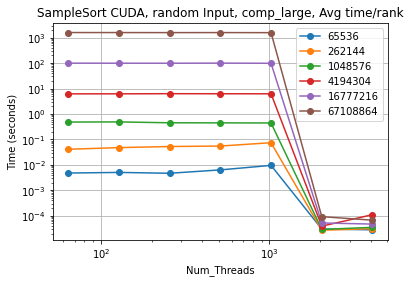

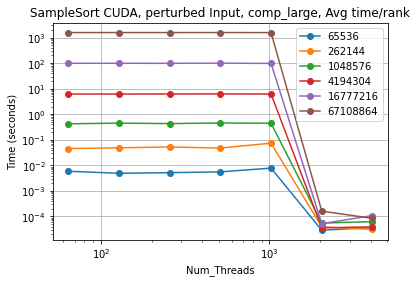

In [42]:
for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "cuda" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]: #[64, 128, 256, 512, 1024]: 
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputSize)    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

            plot_pandas(
                df=masterDF,
                title="SampleSort CUDA, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num_Threads",
                ylabel="Time (seconds)",
                loglog=True
            )

## Speedup

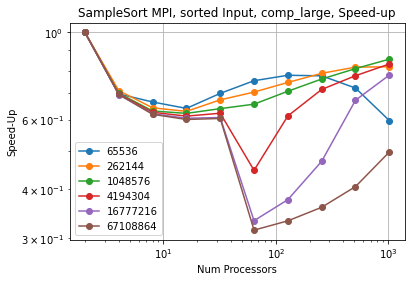

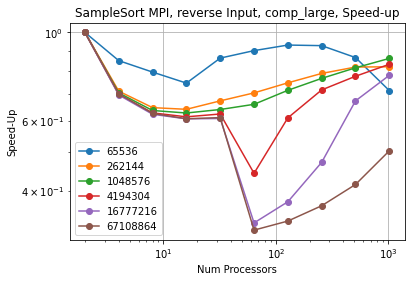

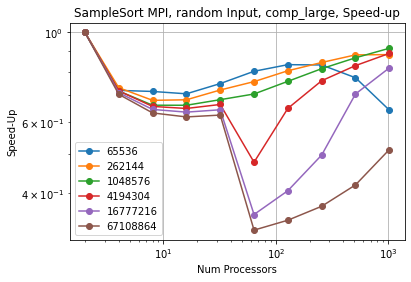

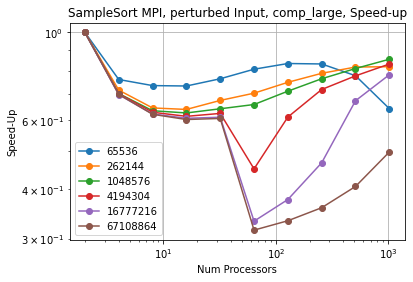

In [38]:
for inputType in ctks.keys():
    if("mpi" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
            tempDF = ctks[inputType].dataframe.loc["comp_large"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][2] / masterDF[inputSize]

        plot_pandas(
            df=masterDF,
            title="SampleSort MPI, " + str(inputType.split("_")[1]) + " Input, comp_large, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )

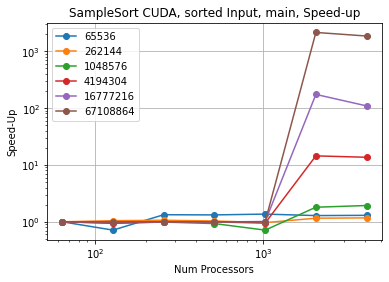

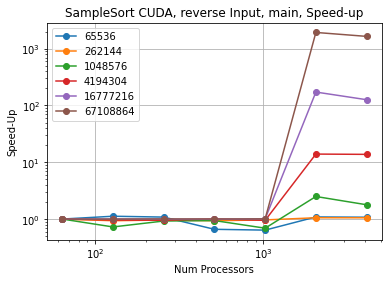

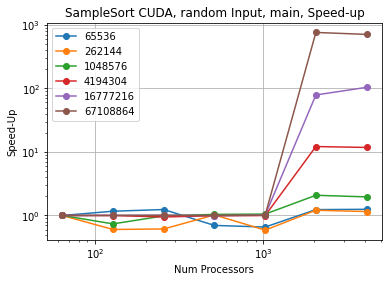

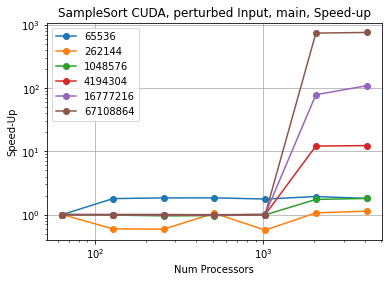

In [39]:
for inputType in ctks.keys():
    if("cuda" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
            tempDF = ctks[inputType].dataframe.loc["main"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][64] / masterDF[inputSize]

        plot_pandas(
            df=masterDF,
            title="SampleSort CUDA, " + str(inputType.split("_")[1]) + " Input, main, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )